In [1]:
import pandas as pd
from sqlalchemy import create_engine

# Load CSV with explicit encoding to avoid decode errors
df = pd.read_csv('data.csv', encoding='latin1')

# Connect to SQLite DB with check_same_thread=False to prevent locking issues in multithreaded environments
engine = create_engine('sqlite:///OnlineShopping.db', connect_args={"check_same_thread": False})

# Insert data into table named 'SalesData' in chunks to avoid locking
df.to_sql('SalesData', con=engine, if_exists='replace', index=False, chunksize=500)

print("Data inserted successfully!")

Data inserted successfully!


In [2]:
print(df.head())  # shows first 5 rows
print(df.columns) # shows column names

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [3]:
import sqlite3

# Connect to the DB
conn = sqlite3.connect('OnlineShopping.db')
cursor = conn.cursor()


In [4]:
# View column names
cursor.execute("PRAGMA table_info(SalesData)")
for col in cursor.fetchall():
    print(col)


(0, 'InvoiceNo', 'TEXT', 0, None, 0)
(1, 'StockCode', 'TEXT', 0, None, 0)
(2, 'Description', 'TEXT', 0, None, 0)
(3, 'Quantity', 'BIGINT', 0, None, 0)
(4, 'InvoiceDate', 'TEXT', 0, None, 0)
(5, 'UnitPrice', 'FLOAT', 0, None, 0)
(6, 'CustomerID', 'FLOAT', 0, None, 0)
(7, 'Country', 'TEXT', 0, None, 0)


In [9]:
query = """
SELECT Country, SUM(CAST(Quantity AS FLOAT) * UnitPrice) AS TotalSales
FROM SalesData
GROUP BY Country
ORDER BY TotalSales DESC;
"""

df_sales = pd.read_sql_query(query, engine)
print(df_sales)


                 Country    TotalSales
0         United Kingdom  8.187806e+06
1            Netherlands  2.846615e+05
2                   EIRE  2.632768e+05
3                Germany  2.216982e+05
4                 France  1.974039e+05
5              Australia  1.370773e+05
6            Switzerland  5.638535e+04
7                  Spain  5.477458e+04
8                Belgium  4.091096e+04
9                 Sweden  3.659591e+04
10                 Japan  3.534062e+04
11                Norway  3.516346e+04
12              Portugal  2.936702e+04
13               Finland  2.232674e+04
14       Channel Islands  2.008629e+04
15               Denmark  1.876814e+04
16                 Italy  1.689051e+04
17                Cyprus  1.294629e+04
18               Austria  1.015432e+04
19             Hong Kong  1.011704e+04
20             Singapore  9.120390e+03
21                Israel  7.907820e+03
22                Poland  7.213140e+03
23           Unspecified  4.749790e+03
24                Greece 

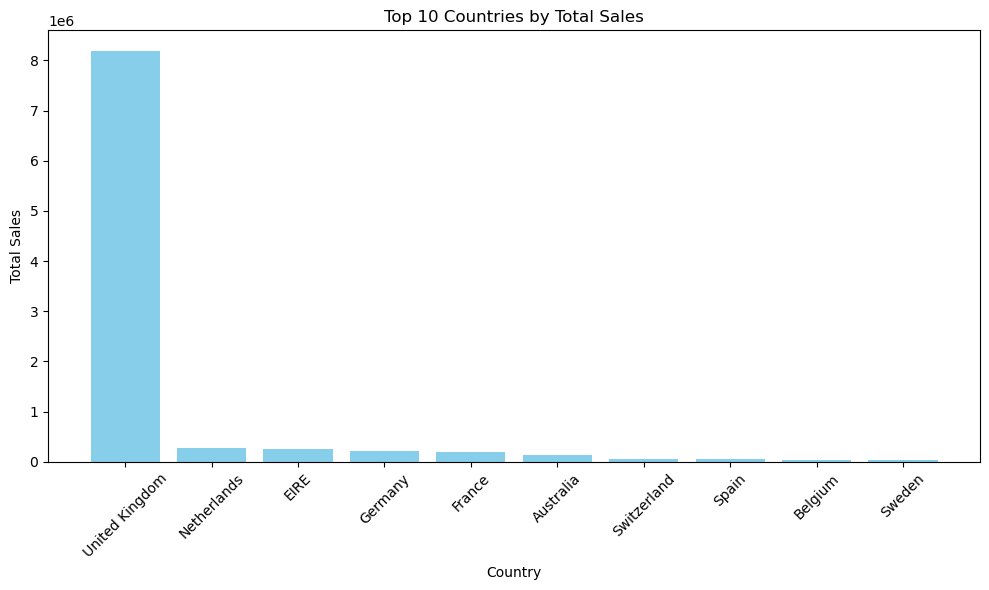

In [10]:
import matplotlib.pyplot as plt

# Take top 10 countries
top_10 = df_sales.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10['Country'], top_10['TotalSales'], color='skyblue')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
query = """
SELECT Description, SUM(Quantity) AS TotalQuantity
FROM SalesData
GROUP BY Description
ORDER BY TotalQuantity DESC
LIMIT 10;

"""

df_sales = pd.read_sql_query(query, engine)
print(df_sales)


                          Description  TotalQuantity
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS          53847
1             JUMBO BAG RED RETROSPOT          47363
2       ASSORTED COLOUR BIRD ORNAMENT          36381
3                      POPCORN HOLDER          36334
4     PACK OF 72 RETROSPOT CAKE CASES          36039
5  WHITE HANGING HEART T-LIGHT HOLDER          35317
6                  RABBIT NIGHT LIGHT          30680
7             MINI PAINT SET VINTAGE           26437
8          PACK OF 12 LONDON TISSUES           26315
9  PACK OF 60 PINK PAISLEY CAKE CASES          24753


In [13]:
query = """
SELECT CustomerID, SUM(Quantity * UnitPrice) AS CustomerRevenue
FROM SalesData
WHERE CustomerID IS NOT NULL
GROUP BY CustomerID
ORDER BY CustomerRevenue DESC
LIMIT 10;

"""

df_sales = pd.read_sql_query(query, engine)
print(df_sales)

   CustomerID  CustomerRevenue
0     14646.0        279489.02
1     18102.0        256438.49
2     17450.0        187482.17
3     14911.0        132572.62
4     12415.0        123725.45
5     14156.0        113384.14
6     17511.0         88125.38
7     16684.0         65892.08
8     13694.0         62653.10
9     15311.0         59419.34


In [14]:
query = """
SELECT 
    strftime('%Y-%m', InvoiceDate) AS Month,
    SUM(CAST(Quantity AS FLOAT) * UnitPrice) AS MonthlySales
FROM SalesData
GROUP BY Month
ORDER BY Month;

"""

df_sales = pd.read_sql_query(query, engine)
print(df_sales)

  Month  MonthlySales
0  None  9.747748e+06


In [15]:
query = """
SELECT 
    Country, 
    SUM(CAST(Quantity AS FLOAT) * UnitPrice) AS TotalSales
FROM SalesData
GROUP BY Country
ORDER BY TotalSales DESC
LIMIT 10;
"""
df_top_countries = pd.read_sql_query(query, engine)
print(df_top_countries)


          Country    TotalSales
0  United Kingdom  8.187806e+06
1     Netherlands  2.846615e+05
2            EIRE  2.632768e+05
3         Germany  2.216982e+05
4          France  1.974039e+05
5       Australia  1.370773e+05
6     Switzerland  5.638535e+04
7           Spain  5.477458e+04
8         Belgium  4.091096e+04
9          Sweden  3.659591e+04


In [16]:
query = """
SELECT 
    CustomerID, 
    SUM(CAST(Quantity AS FLOAT) * UnitPrice) AS Revenue
FROM SalesData
WHERE CustomerID IS NOT NULL
GROUP BY CustomerID
ORDER BY Revenue DESC
LIMIT 10;
"""
df_top_customers = pd.read_sql_query(query, engine)
print(df_top_customers)


   CustomerID    Revenue
0     14646.0  279489.02
1     18102.0  256438.49
2     17450.0  187482.17
3     14911.0  132572.62
4     12415.0  123725.45
5     14156.0  113384.14
6     17511.0   88125.38
7     16684.0   65892.08
8     13694.0   62653.10
9     15311.0   59419.34


In [17]:
query = """
SELECT 
    strftime('%Y-%m', InvoiceDate) AS Month,
    SUM(CAST(Quantity AS FLOAT)) AS TotalQuantity
FROM SalesData
GROUP BY Month
ORDER BY Month;
"""
df_quantity_monthly = pd.read_sql_query(query, engine)
print(df_quantity_monthly)


  Month  TotalQuantity
0  None      5176450.0


In [18]:
query = """
SELECT 
    Description,
    SUM(CAST(Quantity AS FLOAT)) AS TotalSold
FROM SalesData
GROUP BY Description
ORDER BY TotalSold DESC
LIMIT 10;
"""
df_top_products = pd.read_sql_query(query, engine)
print(df_top_products)


                          Description  TotalSold
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS    53847.0
1             JUMBO BAG RED RETROSPOT    47363.0
2       ASSORTED COLOUR BIRD ORNAMENT    36381.0
3                      POPCORN HOLDER    36334.0
4     PACK OF 72 RETROSPOT CAKE CASES    36039.0
5  WHITE HANGING HEART T-LIGHT HOLDER    35317.0
6                  RABBIT NIGHT LIGHT    30680.0
7             MINI PAINT SET VINTAGE     26437.0
8          PACK OF 12 LONDON TISSUES     26315.0
9  PACK OF 60 PINK PAISLEY CAKE CASES    24753.0


In [19]:
query = """
SELECT 
    AVG(Total) AS AvgOrderValue
FROM (
    SELECT 
        InvoiceNo,
        SUM(CAST(Quantity AS FLOAT) * UnitPrice) AS Total
    FROM SalesData
    GROUP BY InvoiceNo
);
"""
df_avg_order = pd.read_sql_query(query, engine)
print(df_avg_order)


   AvgOrderValue
0     376.360924


In [20]:
df_top_countries.to_csv("TopCountries.csv", index=False)
